In [75]:
# -*- coding: utf-8 -*-

%matplotlib inline

import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## <step1. 탐색> : MovieLens 데이터 살펴보기

### [MovieLens 데이터셋의 기본정보]

In [76]:
rating_file_path = './dataset/data/ml-1m/ratings.dat'
movie_file_path = './dataset/data/ml-1m/movies.dat'
user_file_path = './dataset/data/ml-1m/users.dat'

rating_data = pd.io.parsers.read_csv(rating_file_path,
                                    names=['user_id','movie_id','rating','time'],
                                    delimiter = '::')
movie_data = pd.io.parsers.read_csv(movie_file_path,
                                   names=['movie_id','title','genre'],
                                   delimiter='::')
user_data = pd.io.parsers.read_csv(user_file_path,
                                  names=['user_id','gender','age','occuapation','zipcode'],
                                  delimiter='::')

In [77]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [78]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [79]:
user_data.head()

,user_id,gender,age,occuapation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [80]:
print(rating_data.isnull().sum())
print(movie_data.isnull().sum())
print(user_data.isnull().sum())

user_id     0
movie_id    0
rating      0
time        0
dtype: int64
movie_id    0
title       0
genre       0
dtype: int64
user_id        0
gender         0
age            0
occuapation    0
zipcode        0
dtype: int64


## <step2. 분석>:탐샘적 데이터 분석

### [분석할 영화의 정보 탐색하기]

In [106]:
# 총 영화의 개수를 출력합니다.
print("total number of movie in data :", len(movie_data['movie_id'].unique()))

# 연도별 영화 개수가 많은 Top 10 년도를 출력합니다.
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])
movie_data['year'].value_counts().head(10)

total number of movie in data : 3883


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

### `[미니 퀴즈 - 3.3]`
- `영화 데이터에 대한 탐색적 데이터 분석을 더 실행해 봅시다. 영화의 연대별 갯수를 탐색해 보세요.`

In [107]:
# 연대별 영화의 개수를 출력합니다.
movie_data['year_term'] = movie_data['title'].apply(lambda x: x[-5:-2]+"0")
moview_year_term = movie_data['year_term'].value_counts().sort_index()
print(moview_year_term)

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64


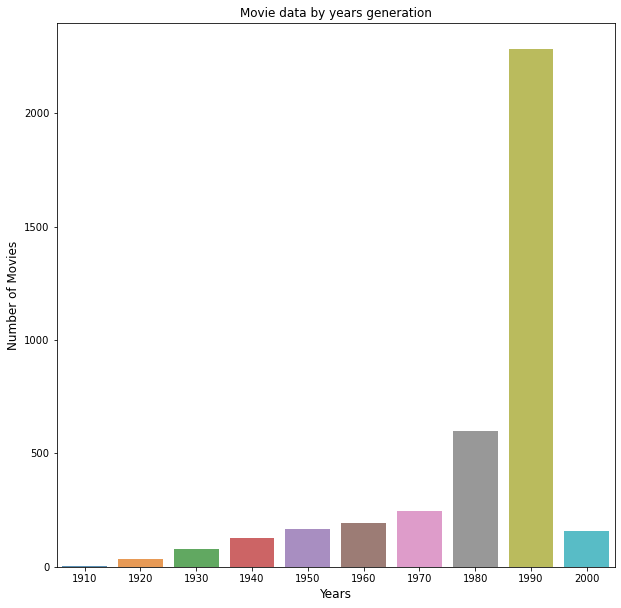

In [108]:
sns.barplot(moview_year_term.index, moview_year_term.values, alpha=0.8)
plt.title('Movie data by years generation')
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.show()

### [장르의 속성 탐색]

In [109]:
# 가장 많이 사용된 장르의 조합을 출력합니다. (Top 10)
movie_data['genre'].value_counts()[:10]

Drama             843
Comedy            521
Horror            178
Comedy|Drama      162
Comedy|Romance    142
Drama|Romance     134
Documentary       116
Thriller          101
Action             65
Drama|Thriller     63
Name: genre, dtype: int64

In [110]:
# 가장 많이 등장한 장르의 속성을 추출합니다. (예시 : Drama)
unique_genre_dict = {}
for index, row in movie_data.iterrows():
    
    # genre 피처를 ‘|’ 구분자로 분리합니다.
    genre_combination = row['genre']
    parsed_genre = genre_combination.split("|")
    
    # 구분자로 분리한 장르의 속성을 unique_genre_dict에 각각 계산하여 저장합니다.
    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1
            
print(unique_genre_dict)

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


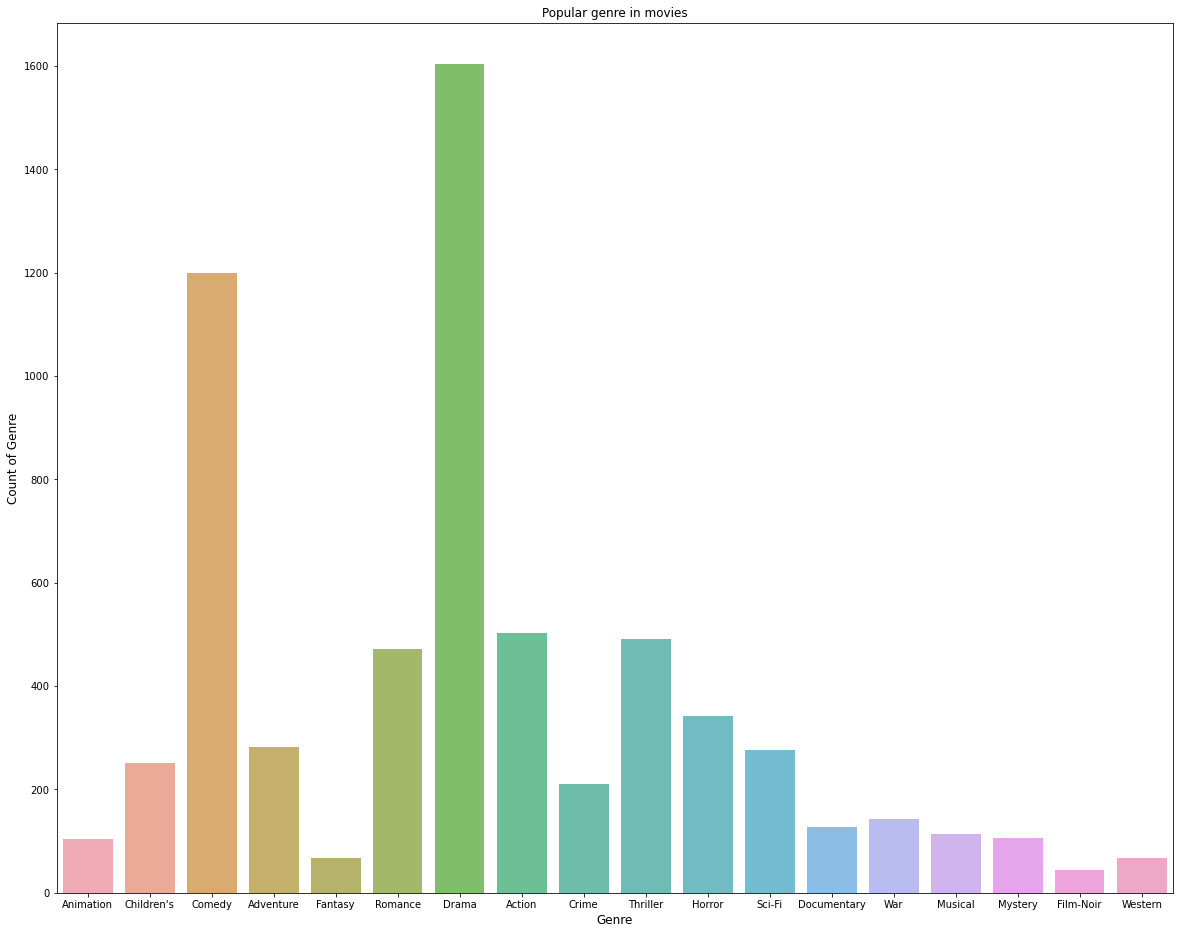

In [111]:
# unique_genre_dict를 이용하여 장르의 속성을 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8)
plt.title('Popular genre in movies')
plt.ylabel('Count of Genre', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

### [분석할 유저의정보 탐색하기]

In [112]:
# 유저의 수를 탐색합니다.
print("total number of user in data :", len(user_data['user_id'].unique()))

total number of user in data : 6040


### `[미니 퀴즈 - 3.4]`
- `유저 데이터에 대한 탐색적 데이터 분석을 실행해 봅시다. 아래의 질문들에 답해보세요.` 
    - 유저의 성별 탐색
    - 유저의 연령대 탐색

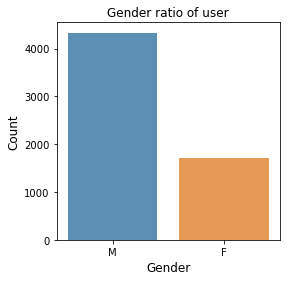

In [113]:
# 유저의 성별을 탐색합니다.
plt.rcParams['figure.figsize'] = [4, 4]
user_gender = user_data['gender'].value_counts()
sns.barplot(user_gender.index, user_gender.values, alpha=0.8)
plt.title('Gender ratio of user')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [114]:
# 유저의 연령대를 탐색합니다.
user_data['age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [115]:
def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0] + "0"

user_data['ages'] = user_data['age'].apply(lambda x: age_classification(x))
user_ages = user_data['ages'].value_counts()

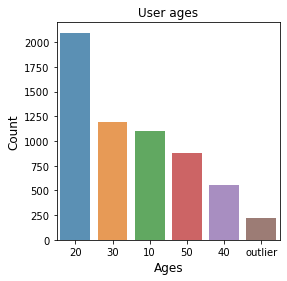

In [116]:
sns.barplot(user_ages.index, user_ages.values, alpha=0.8)
plt.title('User ages')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Ages', fontsize=12)
plt.show()

### [평점 데이터의 정보 탐색하기]

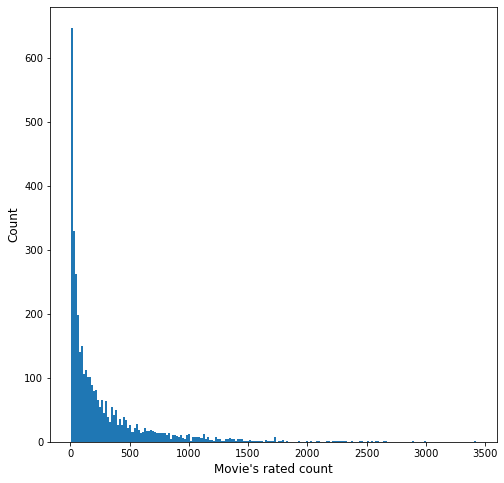

In [117]:
# 각 영화들이 평가받은 횟수를 탐색합니다.
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.hist(movie_rate_count, bins=200)
plt.ylabel('Count', fontsize=12)
plt.xlabel("Movie's rated count", fontsize=12)
plt.show()

In [118]:
print("total number of movie in data :", len(movie_data['movie_id'].unique()))
print("total number of movie rated below 100 :", len(movie_rate_count[movie_rate_count < 100]))

total number of movie in data : 3883
total number of movie rated below 100 : 1687


- 오류밸생 해결 주소  
 - https://stackoverflow.com/questions/60229375/solution-for-specificationerror-nested-renamer-is-not-supported-while-agg-alo

In [94]:
# 영화별 평균 평점을 탐색합니다.
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg(
    [('rated_count','count'), ('rating_mean','mean')])

In [119]:
movie_grouped_rating_info.head(5)

,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757


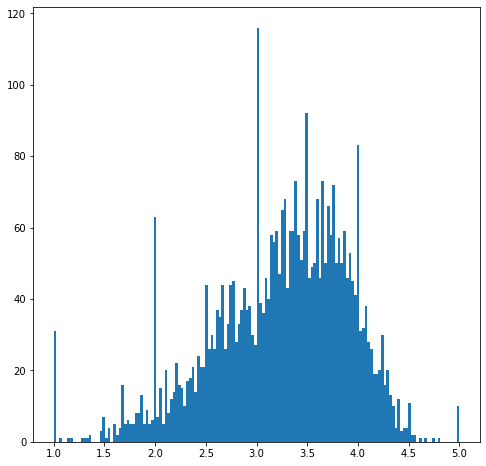

In [120]:
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

In [121]:
# 100번 이상의 평가를 받은 영화 중, 평점이 높은 10개의 영화를 출력합니다.
merged_data = movie_grouped_rating_info.merge(movie_data, on=['movie_id'], how='left')
merged_data[merged_data['rated_count'] > 100][['rating_mean', 'title']].nlargest(10, 'rating_mean')

,rating_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


### `[미니 퀴즈 - 3.5]`
- `동일한 방식으로, 유저 그룹 단위의 평점 속성을 분석해 보세요.` 
    - 유저별로 평가한 영화 개수
    - 유저별로 평가한 평균 영화 점수
    - 유저별로 평가한 영화 점수의 편차

In [98]:
# 유저별 영화 평가를 탐색합니다.
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(
    [('rated_count','count'), ('rating_mean','mean'), ('rating_std','std')])

In [99]:
user_grouped_rating_info.head()

,rated_count,rating_mean,rating_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


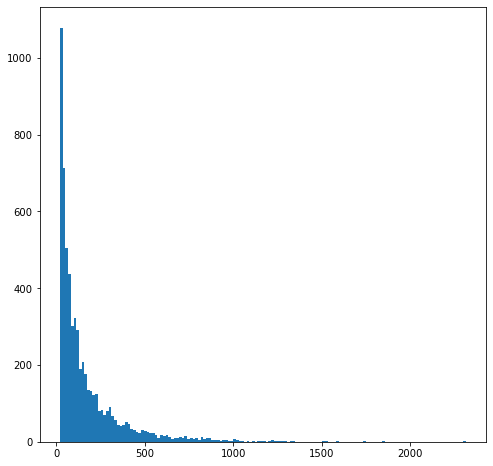

In [122]:
# 유저별로 평가한 영화 개수의 분포를 출력합니다.
user_grouped_rating_info['rated_count'].hist(bins=150, grid=False)

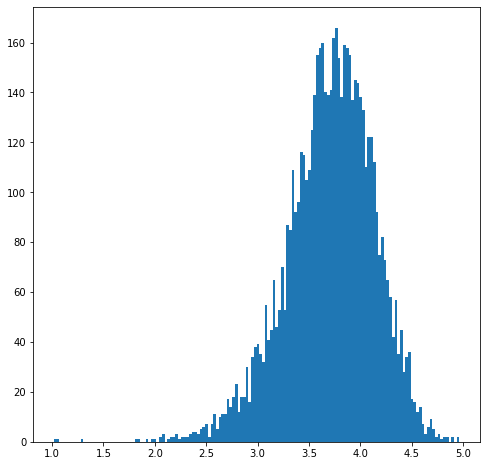

In [123]:
# 유저별로 평가한 영화 점수 평균의 분포를 그래프로 출력합니다.
user_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

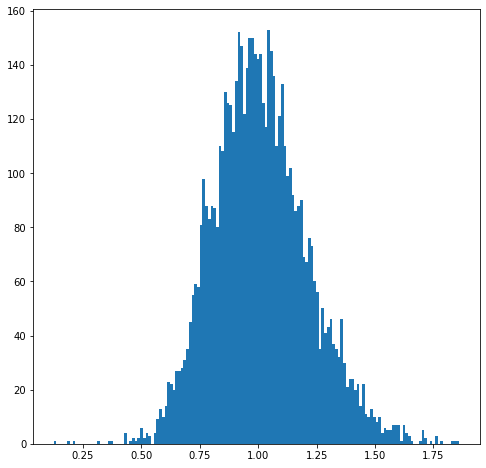

In [124]:
# 유저별로 평가한 영화 점수 편차의 분포를 그래프로 출력합니다.
user_grouped_rating_info['rating_std'].hist(bins=150, grid=False)

### [user_movie  형태의 테이블로 살펴보기]

In [125]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [126]:
# unstack() 함수로 user_id, movie_id를 축으로 하는 데이터를 생성합니다.
rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(["user_id", "movie_id"]).unstack()
rating_table.head(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
7           NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
8           4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
9           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10          5.0  5.0  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9         NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  
10        NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

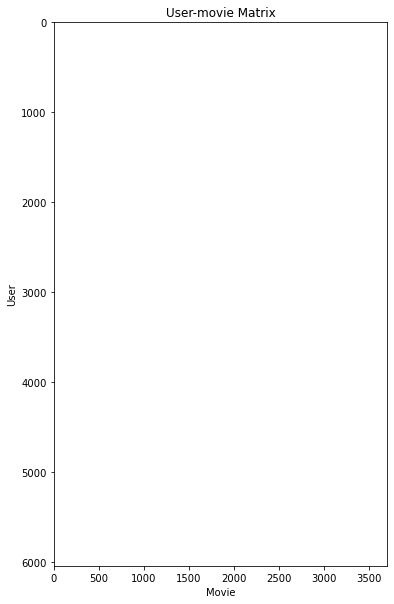

In [128]:
# user-movie 테이블을 시각화합니다.
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel("Movie")
plt.ylabel("User")
plt.title("User-movie Matrix")
plt.show()

## <step3. 예측> : 수학적 기법을 활용한 평범 예측

### [SVD를 활용한 빈칸 채우기]

**빈칸을 포함한 user-item행렬 생성**

In [130]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

np.set_printoptions(suppress=True)
reader = Reader(rating_scale=(1,5))

In [131]:
# 데이터 프레임을 생성합니다. 
rating_dict = {'item_id':[1,2,3,1,2,3,2],
              'user_id':['a','a','a','b','b','b','c'],
              'rating':[2,4,4,2,5,4,5]}
df= pd.DataFrame(rating_dict)
df.head(10)

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [134]:
# 데이터 프레임을 행렬로 변환하여 학인
df_metrix_table = df[['user_id', 'item_id','rating']].set_index(['user_id','item_id']).unstack().fillna(0)
df_metrix_table.head(10)

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          0.0  5.0  0.0

**SVD를 이용한 빈칸 채우기 학습**

In [136]:
# SVD 사용을 위한 데이터 셋을 생성합니다. 
data = Dataset.load_from_df(df=df[['user_id','item_id','rating']], reader=reader)
train_data = data.build_full_trainset()

In [138]:
# SVD 모델을 학습합ㄴ다. 
model = SVD(n_factors=8,
           lr_all = 0.005,
           reg_all = 0.02,
           n_epochs = 10)
model.fit(train_data)

In [139]:
# 학습한 모델을 기반으로 빈공간의 점수를 예측합니다. 
"""
build_anti_testset():

학습에 사용된 metrix에서 0으로 평가되어 있는 (rating이 0인 지점) 부분의 데이터.
user 혹은 item은 학습에 반드시 등장한 적이 있어야 한다는 전제 조건을 통해 추출
"""

# test_data : 학습에 사용된 유저, 혹은 아이켐이지만 점수는 매겨지지 않은 데이터
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)

# 아래의 결과는 빈공간 (test_data)의 점수를 예측한 결과
for _, iid, _, predicted_rating, _ in predictions:
    print('item id', iid, '|','predicted rating : ', predicted_rating )

item id 1 | predicted rating :  3.634966509696794
item id 3 | predicted rating :  3.7943674983242337


In [142]:
"""
build_testset() : 

학습에 사용된 matrix에서 0으로 평가되어 있는(rating이 0인 지점) 부분의 데이터.
user 혹은 item은 학습에 반드시 등장한 적이 있어야 한다는 전제조건을 통해 추출.
"""
test_data = train_data.build_testset()
predictions = model.test(test_data)

# 원래부터 비어있지 않았던 행렬의 값들을 출력한 것입니다. real rating은 원래 값, predicted rating은 행렬 완성 후 예측된 값입니다.
for _, iid, r_ui, predicted_rating, _ in predictions:
    print("Item id", iid, "|", "real rating :", r_ui, "|", "predicted rating :", predicted_rating)

Item id 1 | real rating : 2.0 | predicted rating : 3.497993196242766
Item id 2 | real rating : 4.0 | predicted rating : 3.796170162765748
Item id 3 | real rating : 4.0 | predicted rating : 3.7253149912456043
Item id 1 | real rating : 2.0 | predicted rating : 3.516235572191357
Item id 2 | real rating : 5.0 | predicted rating : 3.865118679433542
Item id 3 | real rating : 4.0 | predicted rating : 3.7522273979529155
Item id 2 | real rating : 5.0 | predicted rating : 3.9161894866001985


### [아직 평가하지 않은 영화의 점수 예측하기]
* MovieLens 데이터의 SVD 적용하기

In [144]:
# SVD 라이브러리를 사용하기 위한 학습데이터를 생성합니다. 
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[['user_id','movie_id','rating']], reader)
train_data = data.build_full_trainset()

# SVD 모델을 학습합니다. 
train_start = time.time()
model  = SVD(n_factors =8,
            lr_all=0.005,
            reg_all = 0.02,
            n_epochs=100)

model.fit(train_data)
train_end = time.time()
print('training time of model: %.2f seconds' % (train_end - train_start))

training time of model: 117.00 seconds


**영화의 점수를 예측할 타켓유저 선정**

In [145]:
# user_id가 4인 유저의영화 평가 데이터
target_user_id = 4
target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data.head(5)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [148]:
# user_id 4인 유저가 평가한 영화 히스토리 정보를 추출한다. 
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
    
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


**타켓 유저가 보지 않은 영화 중, 예상 평점이 높은 10개 선정**

In [160]:
# 타겟 유저(user_id가 4인 유저)가 보지 않은 영화 정보를 테스트 데이터로 생성합니다.
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))

In [161]:
# 타겟 유저의 평점 점수를 예측합니다.
target_user_predictions = model.test(test_data)

# 예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장합니다.
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions, 
                                                            user_id=target_user_id, 
                                                            user_history=target_user_movie_rating_dict)

In [162]:
# target_user_movie_predict_dict에서 예측된 점수 중, 타겟 유저의 Top 10 영화를 선정합니다.
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(), 
                                     key=operator.itemgetter(1), reverse=True)[:10]

In [163]:
# 예측된 top10 영화
target_user_top10_predicted

[(3468, 4.971427347475123),
 (2028, 4.68025342831501),
 (1201, 4.590910929753885),
 (1387, 4.582946824612669),
 (1214, 4.57338824524422),
 (1198, 4.488612850799758),
 (2947, 4.439924739391323),
 (2951, 4.41300474887737),
 (1954, 4.321256994274244),
 (1097, 4.304221359118652)]

In [164]:
# 타이틀 정보로 출력하기 위해 movie_id마다 movie_title을 딕셔너리 형태로 저장
movie_dict = {}
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id]  = movie_title

In [165]:
# 앞서 계산한 top10영화에 movie_title을 매핑하여 출력합니다. 
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ':', predicted_rating)

Hustler, The (1961) : 4.971427347475123
Saving Private Ryan (1998) : 4.68025342831501
Good, The Bad and The Ugly, The (1966) : 4.590910929753885
Jaws (1975) : 4.582946824612669
Alien (1979) : 4.57338824524422
Raiders of the Lost Ark (1981) : 4.488612850799758
Goldfinger (1964) : 4.439924739391323
Fistful of Dollars, A (1964) : 4.41300474887737
Rocky (1976) : 4.321256994274244
E.T. the Extra-Terrestrial (1982) : 4.304221359118652


In [166]:
# 타겟 유저의 기존 선호 영화와 비교합니다. 
target_user_top10_real = sorted(target_user_movie_rating_dict.items(),
                               key = operator.itemgetter(1), reverse=True)[:10]

for real in target_user_top10_real:
    movie_id = real[0]
    real_rating = real[1]
    print(movie_dict[movie_id], ':', real_rating)

Nobody Loves Me (Keiner liebt mich) (1994) : 5
Little Princess, A (1995) : 5
Schindler's List (1993) : 5
Great Day in Harlem, A (1994) : 5
Fargo (1996) : 5
Bread and Chocolate (Pane e cioccolata) (1973) : 5
Land and Freedom (Tierra y libertad) (1995) : 5
Aparajito (1956) : 5
World of Apu, The (Apur Sansar) (1959) : 5
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) : 5


## <step4. 평가> : 예측 모델 평가하기
### [예측 모델의 평가 방법]
**RMSE 계산하기**

In [168]:
# SVD 라이브러리를 사용하기 위한 학습데이터를 생성합니다. 학습데이터와 테스트 데이터를 8:2로 분리합니다. 
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[['user_id','movie_id','rating']], reader)
train_data, test_data = train_test_split(data, test_size= 0.2)

# SVD 모델을 학습합니다. 
train_start = time.time()
model = SVD(n_factors =8,
           lr_all = 0.005,
           reg_all = 0.02,
           n_epochs=100)

model.fit(train_data)
train_end = time.time()
print('training time of model: %.2f seconds' % (train_end - train_start))

predictions = model.test(test_data)

# 데스트 데이터의 RMSE를 출력합니다. 
print('RMSE of test dataset in SVD model: ')
accuracy.rmse(predictions)

training time of model: 116.15 seconds
RMSE of test dataset in SVD model: 
RMSE: 0.8598


0.8598325916158986

### `[미니 퀴즈 - 3.6]`
- `SVD 예제에서 하이퍼 파라미터를 바꿔가며 RMSE를 출력해 보세요.` 
    - RMSE를 이용해 적당한 하이퍼 파라미터 n_factors를 찾아봅시다.
    - 하이퍼 파라미터 n_factors 설정 변화에 따른 RMSE 그래프를 출력해 보세요.

**하이퍼 파라미터 튜닝 예시**

In [171]:
rmse_list_by_factors = []
ttime_list_by_factors =[]
for n in range(1,15):
    train_start = time.time()
    model = SVD(n_factors = n,
               lr_all = 0.005,
               reg_all = 0.02,
               n_epochs = 100)
    model.fit(train_data)
    train_end = time.time()
    print('traing time of model: %.2f seconds' % (train_end - train_start))
    print('RMSE of test dataset in SVD model, n_factors=' + str(n))
    predictions = model.test(test_data)
    rmse_result = accuracy.rmse(predictions)
    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append((train_end - train_start))
    print('----------------------------------------')
print('searching n_factors is finish')

traing time of model: 87.95 seconds
RMSE of test dataset in SVD model, n_factors=1
RMSE: 0.8850
----------------------------------------
traing time of model: 90.43 seconds
RMSE of test dataset in SVD model, n_factors=2
RMSE: 0.8779
----------------------------------------
traing time of model: 95.07 seconds
RMSE of test dataset in SVD model, n_factors=3
RMSE: 0.8681
----------------------------------------
traing time of model: 97.41 seconds
RMSE of test dataset in SVD model, n_factors=4
RMSE: 0.8641
----------------------------------------
traing time of model: 101.14 seconds
RMSE of test dataset in SVD model, n_factors=5
RMSE: 0.8622
----------------------------------------
traing time of model: 107.02 seconds
RMSE of test dataset in SVD model, n_factors=6
RMSE: 0.8596
----------------------------------------
traing time of model: 107.83 seconds
RMSE of test dataset in SVD model, n_factors=7
RMSE: 0.8606
----------------------------------------
traing time of model: 105.79 seconds
R

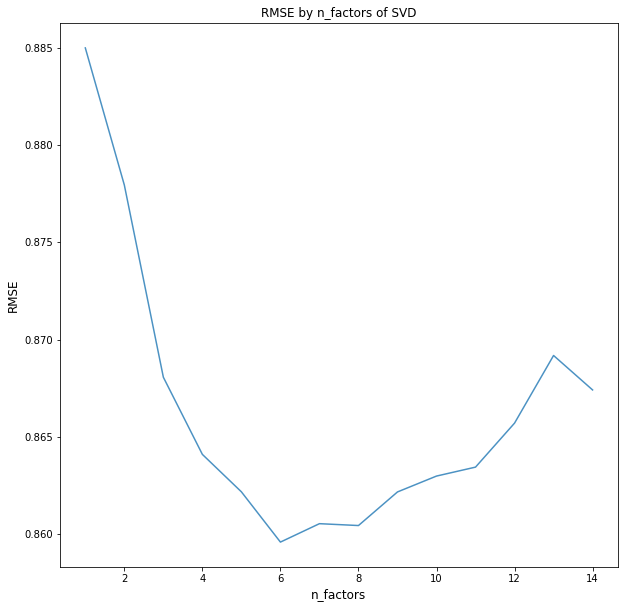

In [172]:
plt.plot(range(1,15), rmse_list_by_factors, alpha=0.8)
plt.title('RMSE by n_factors of SVD')
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()

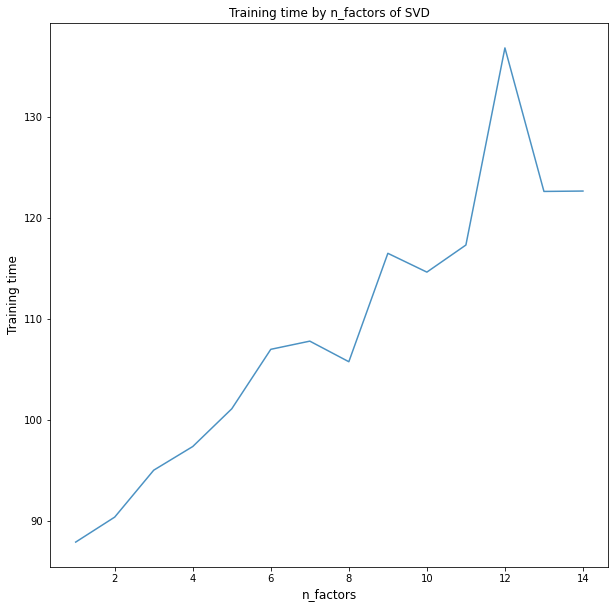

In [173]:
plt.plot(range(1,15), ttime_list_by_factors, alpha=0.8)
plt.title('Training time by n_factors of SVD')
plt.ylabel('Training time', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()

### [실제평점과 비교 시각화 ]

**평점예측단**

In [193]:
# 타겟 유저 정보를 테스트 데이터로 생성합니다.
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    if movie_id in target_user_movie_rating_dict:
        rating = target_user_movie_rating_dict[movie_id]
        test_data.append((target_user_id, movie_id, rating))

In [194]:
# 타겟 유저의 평점 점수를 예측합니다.
target_user_predictions = model.test(test_data)

# 예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장합니다.
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

# target_user_movie_predict_dict에서 예측된 점수 중, 타겟 유저의 Top 10 영화를 선정합니다.
target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions, 
                                                            user_id=target_user_id, 
                                                            user_history=target_user_movie_rating_dict)

In [195]:
target_user_movie_predict_dict

{1: 4.259156271407291,
 2: 3.0905166676996756,
 3: 3.1601850599530046,
 4: 2.9918736764557288,
 5: 2.923910063747699,
 6: 4.121773715437419,
 7: 3.2816461589170594,
 8: 3.3302772204518383,
 9: 3.0703776388786324,
 10: 3.541236812088988,
 11: 4.35571434835119,
 12: 2.1468069655360917,
 13: 3.533038569275521,
 14: 4.18899662489272,
 15: 2.5295456807087056,
 16: 4.049754695121909,
 17: 4.174102922631867,
 18: 2.3799476946201925,
 19: 2.0805809319292385,
 20: 3.0857034330625366,
 21: 4.044457867585131,
 22: 3.874067899840413,
 23: 2.5556569660695474,
 24: 3.0495542978809227,
 25: 4.206313648525004,
 26: 3.590101161813631,
 27: 2.6337139634862305,
 28: 4.568477414281631,
 29: 3.679339050590248,
 30: 3.886809392738689,
 31: 3.5845452761508936,
 32: 3.7583262676545157,
 33: 3.5293273367650566,
 34: 4.853983579225163,
 35: 3.719853119284189,
 36: 4.568899400975695,
 37: 3.981991757478183,
 38: 2.255679361708852,
 39: 4.203040593893366,
 40: 3.530824656848784,
 41: 3.896930157783213,
 42: 3.048

In [196]:
# 예측 점수와 실제 점수를 영화 타이틀에 매핑합니다.
origin_rating_list = []
predicted_rating_list = []
movie_title_list = []
idx = 0
for movie_id, predicted_rating in target_user_movie_predict_dict.items():
    idx = idx + 1
    predicted_rating = round(predicted_rating, 2)
    origin_rating = target_user_movie_rating_dict[movie_id]
    movie_title = movie_dict[movie_id]
    print("movie", str(idx), ":", movie_title, "-", origin_rating, "/", predicted_rating)
    origin_rating_list.append(origin_rating)
    predicted_rating_list.append(predicted_rating)
    movie_title_list.append(str(idx))

movie 1 : Toy Story (1995) - 4.351084209147229 / 4.26
movie 2 : Jumanji (1995) - 3.041502990746296 / 3.09
movie 3 : Grumpier Old Men (1995) - 2.7799110407740812 / 3.16
movie 4 : Waiting to Exhale (1995) - 3.1052491343194113 / 2.99
movie 5 : Father of the Bride Part II (1995) - 2.8990610114969284 / 2.92
movie 6 : Heat (1995) - 4.294499860159856 / 4.12
movie 7 : Sabrina (1995) - 3.5122654735206797 / 3.28
movie 8 : Tom and Huck (1995) - 3.1976645395577457 / 3.33
movie 9 : Sudden Death (1995) - 2.8231263824609796 / 3.07
movie 10 : GoldenEye (1995) - 3.424300703994304 / 3.54
movie 11 : American President, The (1995) - 3.87856831896982 / 4.36
movie 12 : Dracula: Dead and Loving It (1995) - 2.2106814914099893 / 2.15
movie 13 : Balto (1995) - 3.926547271452162 / 3.53
movie 14 : Nixon (1995) - 4.322649301567495 / 4.19
movie 15 : Cutthroat Island (1995) - 2.458724418416366 / 2.53
movie 16 : Casino (1995) - 4.028897412998328 / 4.05
movie 17 : Sense and Sensibility (1995) - 4.581516048612489 / 4.1

movie 185 : Nine Months (1995) - 2.9539302244341914 / 2.83
movie 186 : Party Girl (1995) - 3.195696940031421 / 3.37
movie 187 : Prophecy, The (1995) - 2.8670386160661456 / 2.75
movie 188 : Reckless (1995) - 4.269956487954305 / 3.57
movie 189 : Safe (1995) - 3.869057728229215 / 3.34
movie 190 : Scarlet Letter, The (1995) - 2.8900783071889724 / 2.86
movie 191 : Show, The (1995) - 3.3687892013318224 / 3.47
movie 192 : Showgirls (1995) - 2.037663590437823 / 1.58
movie 193 : Smoke (1995) - 3.8364646462043956 / 4.34
movie 194 : Something to Talk About (1995) - 3.4275625927535636 / 2.96
movie 195 : Species (1995) - 3.084182928316124 / 2.8
movie 196 : Stars Fell on Henrietta, The (1995) - 3.595039630331587 / 3.11
movie 197 : Strange Days (1995) - 3.095269329328853 / 3.11
movie 198 : Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964) - 4.647448092224567 / 4.34
movie 199 : Tie That Binds, The (1995) - 3.5370907263027025 / 3.02
movie 200 : Three Wishes (1995) - 3.8527866267445505 /

movie 344 : Bullets Over Broadway (1994) - 3.6720245149275663 / 3.8
movie 345 : Clear and Present Danger (1994) - 3.963952056487704 / 3.94
movie 346 : Client, The (1994) - 3.758166971914764 / 3.82
movie 347 : Corrina, Corrina (1994) - 3.4112716607064018 / 3.4
movie 348 : Crooklyn (1994) - 3.985313647803024 / 3.12
movie 349 : Crow, The (1994) - 2.3807913256003386 / 2.57
movie 350 : Cobb (1994) - 3.542272221756446 / 3.99
movie 351 : Flintstones, The (1994) - 2.08951483701571 / 1.91
movie 352 : Forrest Gump (1994) - 3.8380532234802143 / 3.96
movie 353 : Four Weddings and a Funeral (1994) - 4.319106650277174 / 4.21
movie 354 : Higher Learning (1995) - 2.834109151449674 / 3.26
movie 355 : I Like It Like That (1994) - 3.4895423328959376 / 3.35
movie 356 : I Love Trouble (1994) - 2.889376030551151 / 2.32
movie 357 : It Could Happen to You (1994) - 3.4151152502428292 / 3.46
movie 358 : Jungle Book, The (1994) - 3.489595133867418 / 3.63
movie 359 : Wonderful, Horrible Life of Leni Riefenstahl, 

movie 554 : Paris, France (1993) - 3.5676506890456237 / 3.42
movie 555 : Beans of Egypt, Maine, The (1994) - 3.896939018150499 / 3.29
movie 556 : Killer (Bulletproof Heart) (1994) - 3.6018678104074855 / 3.72
movie 557 : Welcome to the Dollhouse (1995) - 4.047614447163272 / 4.1
movie 558 : Germinal (1993) - 3.764382178208934 / 3.96
movie 559 : Chasers (1994) - 2.200438690759882 / 2.5
movie 560 : Cronos (1992) - 3.840253712034288 / 3.69
movie 561 : Naked in New York (1994) - 3.34695594181786 / 3.25
movie 562 : Kika (1993) - 4.923989940275191 / 3.66
movie 563 : Bhaji on the Beach (1993) - 3.943607349906517 / 3.65
movie 564 : Little Big League (1994) - 3.23951064674381 / 3.02
movie 565 : Slingshot, The (K�disbellan ) (1993) - 4.257057086943932 / 3.63
movie 566 : Wedding Gift, The (1994) - 4.19471090876132 / 4.11
movie 567 : Foreign Student (1994) - 4.202718194293551 / 4.47
movie 568 : Ciao, Professore! (Io speriamo che me la cavo ) (1993) - 3.9765895516230234 / 3.58
movie 569 : Spanking th

movie 771 : Fan, The (1996) - 2.885064673149039 / 3.1
movie 772 : Hunchback of Notre Dame, The (1996) - 3.32698569311723 / 3.09
movie 773 : Cable Guy, The (1996) - 2.290683198477636 / 2.58
movie 774 : Kingpin (1996) - 3.077870587216023 / 3.5
movie 775 : Eraser (1996) - 3.303595115600852 / 3.23
movie 776 : Gate of Heavenly Peace, The (1995) - 4.800813358870997 / 4.3
movie 777 : Nutty Professor, The (1996) - 2.8140856269659404 / 3.28
movie 778 : I, Worst of All (Yo, la peor de todas) (1990) - 4.004542670077449 / 3.88
movie 779 : An Unforgettable Summer (1994) - 3.680122668144033 / 3.93
movie 780 : Last Klezmer: Leopold Kozlowski, His Life and Music, The (1995) - 3.68623014098594 / 3.79
movie 781 : Hungarian Fairy Tale, A (1987) - 4.32005320919401 / 3.78
movie 782 : My Life and Times With Antonin Artaud (En compagnie d'Antonin Artaud) (1993) - 3.5919392212299575 / 3.91
movie 783 : Midnight Dancers (Sibak) (1994) - 3.8051228135471895 / 3.76
movie 784 : Somebody to Love (1994) - 3.805122813

movie 955 : Night of the Living Dead (1968) - 3.677697034932314 / 3.86
movie 956 : African Queen, The (1951) - 5 / 5
movie 957 : Beat the Devil (1954) - 4.1061191958940215 / 4.19
movie 958 : Cat on a Hot Tin Roof (1958) - 4.868484717374203 / 4.27
movie 959 : Last Time I Saw Paris, The (1954) - 3.141757544355872 / 3.11
movie 960 : Meet John Doe (1941) - 4.993852902314395 / 3.93
movie 961 : Algiers (1938) - 4.283950461479014 / 3.87
movie 962 : Something to Sing About (1937) - 3.4783990660205535 / 3.6
movie 963 : Farewell to Arms, A (1932) - 4.339748265779495 / 3.95
movie 964 : Moonlight Murder (1936) - 3.1982938936141596 / 3.76
movie 965 : Blue Angel, The (Blaue Engel, Der) (1930) - 4.634638958518206 / 4.31
movie 966 : Nothing Personal (1995) - 3.8051228135471895 / 3.76
movie 967 : In the Line of Duty 2 (1987) - 3.7300705883948853 / 3.37
movie 968 : Dangerous Ground (1997) - 3.072094822632688 / 3.47
movie 969 : Picnic (1955) - 4.807928416287508 / 4.43
movie 970 : Madagascar Skin (1995) -

movie 1147 : Farmer & Chase (1995) - 3.8051228135471895 / 3.76
movie 1148 : Dear God (1996) - 2.8551699778991257 / 2.6
movie 1149 : Bad Moon (1996) - 2.670669833833662 / 2.77
movie 1150 : American Dream (1990) - 4.407826504671539 / 5
movie 1151 : Best of the Best 3: No Turning Back (1995) - 2.247342406114415 / 2.6
movie 1152 : Bob Roberts (1992) - 3.718785342259211 / 4.05
movie 1153 : Cinema Paradiso (1988) - 4.863277661377309 / 4.47
movie 1154 : Cook the Thief His Wife & Her Lover, The (1989) - 2.8508075380402436 / 2.95
movie 1155 : Grosse Fatigue (1994) - 4.540678766163216 / 3.91
movie 1156 : Delicatessen (1991) - 3.885370011321148 / 3.8
movie 1157 : Double Life of Veronique, The (La Double Vie de V�ronique) (1991) - 4.757347325645556 / 3.58
movie 1158 : Enchanted April (1991) - 4.238532265642399 / 3.95
movie 1159 : Paths of Glory (1957) - 5 / 4.66
movie 1160 : Grifters, The (1990) - 4.501069557756191 / 4.03
movie 1161 : Hear My Song (1991) - 4.154547354454615 / 4.05
movie 1162 : Sho

movie 1365 : Sneakers (1992) - 3.5843759304872194 / 3.76
movie 1366 : Bastard Out of Carolina (1996) - 4.491971415894129 / 3.39
movie 1367 : In Love and War (1996) - 2.350210481190377 / 2.09
movie 1368 : Marvin's Room (1996) - 4.004268976288363 / 3.8
movie 1369 : Somebody is Waiting (1996) - 3.8051228135471895 / 3.76
movie 1370 : Ghosts of Mississippi (1996) - 3.729761549479345 / 3.56
movie 1371 : Night Falls on Manhattan (1997) - 3.5900973217183196 / 3.67
movie 1372 : Beavis and Butt-head Do America (1996) - 2.737159728515896 / 3.45
movie 1373 : C�r�monie, La (1995) - 3.5111175670815022 / 3.49
movie 1374 : Scream (1996) - 3.3075134004735878 / 3.53
movie 1375 : Last of the Mohicans, The (1992) - 4.131777207367423 / 3.86
movie 1376 : Michael (1996) - 3.1447942975991117 / 3.25
movie 1377 : Evening Star, The (1996) - 2.937866083991051 / 2.92
movie 1378 : Hamlet (1996) - 4.191321714296415 / 3.75
movie 1379 : Some Mother's Son (1996) - 4.108451620529712 / 4.15
movie 1380 : Whole Wide World,

movie 1522 : Contempt (Le M�pris) (1963) - 4.604323671667238 / 3.86
movie 1523 : Face/Off (1997) - 3.340782813675206 / 3.86
movie 1524 : Fall (1997) - 3.4797288676758154 / 2.74
movie 1525 : Gabbeh (1996) - 3.866778733785736 / 3.39
movie 1526 : Mondo (1996) - 3.8051228135471895 / 3.76
movie 1527 : Innocent Sleep, The (1995) - 3.8051228135471895 / 3.76
movie 1528 : For Ever Mozart (1996) - 3.5724696163324565 / 3.52
movie 1529 : Men in Black (1997) - 3.641522151480798 / 3.77
movie 1530 : Out to Sea (1997) - 2.4902935415702574 / 2.88
movie 1531 : Wild America (1997) - 3.1607175907713962 / 2.96
movie 1532 : Simple Wish, A (1997) - 2.7478907787292997 / 2.55
movie 1533 : Contact (1997) - 3.799283177453024 / 4.08
movie 1534 : Love Serenade (1996) - 2.6928396837346034 / 2.78
movie 1535 : G.I. Jane (1997) - 2.959101628512099 / 3.24
movie 1536 : Conan the Barbarian (1982) - 2.8862437580607443 / 2.58
movie 1537 : George of the Jungle (1997) - 2.929722629400575 / 2.87
movie 1538 : Cop Land (1997) -

movie 1725 : Callej�n de los milagros, El (1995) - 3.9260140676471287 / 4.07
movie 1726 : In God's Hands (1998) - 3.297729498522482 / 3.22
movie 1727 : Everest (1998) - 4.497815553062452 / 4.55
movie 1728 : Hush (1998) - 2.710979895903396 / 3.18
movie 1729 : Suicide Kings (1997) - 3.2085569563434553 / 3.56
movie 1730 : Man in the Iron Mask, The (1998) - 2.8042857320811714 / 2.58
movie 1731 : Newton Boys, The (1998) - 3.555715878834697 / 3.11
movie 1732 : Wild Things (1998) - 3.9436767251146985 / 4.1
movie 1733 : Paulie (1998) - 2.768518035699671 / 2.9
movie 1734 : Cool Dry Place, A (1998) - 3.963574252991513 / 3.87
movie 1735 : Hana-bi (1997) - 5 / 4.51
movie 1736 : Primary Colors (1998) - 4.140072815705959 / 4.4
movie 1737 : Niagara, Niagara (1997) - 3.8083355446424263 / 3.53
movie 1738 : Wide Awake (1998) - 3.673230096557594 / 3.82
movie 1739 : Price Above Rubies, A (1998) - 3.3840849180920785 / 3.26
movie 1740 : Eden (1997) - 3.492262560933821 / 3.15
movie 1741 : Two Girls and a Guy

movie 1904 : Halloween III: Season of the Witch (1983) - 2.960313113165437 / 1.93
movie 1905 : Halloween 4: The Return of Michael Myers (1988) - 1.916888859475614 / 2.22
movie 1906 : Halloween 5: The Revenge of Michael Myers (1989) - 1.3744138984429877 / 1.89
movie 1907 : Prom Night (1980) - 2.3732144786210387 / 2.37
movie 1908 : Hello Mary Lou: Prom Night II (1987) - 2.182163763707437 / 2.32
movie 1909 : Prom Night III: The Last Kiss (1989) - 1.9430917878029978 / 2.15
movie 1910 : Prom Night IV: Deliver Us From Evil (1992) - 2.0370793817419797 / 2.12
movie 1911 : Child's Play (1988) - 2.3474630426269276 / 2.93
movie 1912 : Child's Play 2 (1990) - 2.0971454741874176 / 2.33
movie 1913 : Child's Play 3 (1992) - 2.4200290253902192 / 2.47
movie 1914 : Poltergeist (1982) - 3.6459884142555534 / 4.09
movie 1915 : Poltergeist II: The Other Side (1986) - 1.8391974790222725 / 2.1
movie 1916 : Poltergeist III (1988) - 1.5792402846015452 / 1.94
movie 1917 : Exorcist, The (1973) - 4.40216330384192 

movie 2046 : First Love, Last Rites (1997) - 3.865551780289131 / 4.02
movie 2047 : Safe Men (1998) - 3.589506677676701 / 3.55
movie 2048 : Saltmen of Tibet, The (1997) - 4.727907408280681 / 4.38
movie 2049 : Atlantic City (1980) - 4.626779834626644 / 4.8
movie 2050 : Autumn Sonata (H�stsonaten ) (1978) - 3.799418572366208 / 4.39
movie 2051 : Who's Afraid of Virginia Woolf? (1966) - 4.784439231670635 / 3.88
movie 2052 : Adventures in Babysitting (1987) - 3.3311116193954846 / 3.64
movie 2053 : Weird Science (1985) - 3.0334285744493643 / 3.27
movie 2054 : Doctor Dolittle (1967) - 3.148579395400493 / 3.07
movie 2055 : Nutty Professor, The (1963) - 3.120860185108142 / 3.2
movie 2056 : Charlotte's Web (1973) - 4.523992767647989 / 4.55
movie 2057 : Watership Down (1978) - 4.080221282171005 / 4.15
movie 2058 : Secret of NIMH, The (1982) - 3.1824929472311614 / 3.45
movie 2059 : Dark Crystal, The (1982) - 2.7736659494122056 / 3.01
movie 2060 : American Tail, An (1986) - 3.1716944037726353 / 3.26

movie 2254 : Waterboy, The (1998) - 2.006891479719348 / 1.99
movie 2255 : Elizabeth (1998) - 4.779647409484884 / 4.44
movie 2256 : Velvet Goldmine (1998) - 3.6469838629808455 / 3.32
movie 2257 : I Still Know What You Did Last Summer (1998) - 2.6894083796337838 / 2.3
movie 2258 : I'll Be Home For Christmas (1998) - 3.0697455890676686 / 2.65
movie 2259 : Meet Joe Black (1998) - 2.7248042489738733 / 2.93
movie 2260 : Dancing at Lughnasa (1998) - 3.573413829130352 / 3.21
movie 2261 : Hard Core Logo (1996) - 3.8741319326413084 / 3.43
movie 2262 : Naked Man, The (1998) - 3.1870317964296806 / 2.98
movie 2263 : Runaway Train (1985) - 4.171467311364438 / 4.14
movie 2264 : Desert Bloom (1986) - 4.039039556709013 / 3.79
movie 2265 : Stepford Wives, The (1975) - 3.710145482393152 / 3.94
movie 2266 : Pope of Greenwich Village, The (1984) - 4.275630478357721 / 4.51
movie 2267 : Sid and Nancy (1986) - 3.904532940900854 / 3.62
movie 2268 : Mona Lisa (1986) - 4.385198885502236 / 3.98
movie 2269 : Heart

movie 2590 : Thirteenth Floor, The (1999) - 3.3246677644829083 / 2.97
movie 2591 : Eternity and a Day (Mia eoniotita ke mia mera ) (1998) - 4.461011364817451 / 4.11
movie 2592 : Loss of Sexual Innocence, The (1999) - 2.5800637522428174 / 2.71
movie 2593 : Twice Upon a Yesterday (1998) - 3.094690678951481 / 3.47
movie 2594 : Instinct (1999) - 3.1846198784093938 / 2.64
movie 2595 : Buena Vista Social Club (1999) - 4.772185622597008 / 4.28
movie 2596 : Desert Blue (1999) - 2.981336334385106 / 3.53
movie 2597 : Finding North (1999) - 2.89369472715008 / 2.41
movie 2598 : Floating (1997) - 3.8051228135471895 / 3.76
movie 2599 : Free Enterprise (1998) - 3.5311895475790056 / 3.45
movie 2600 : Limbo (1999) - 4.407455764738811 / 4.13
movie 2601 : Austin Powers: The Spy Who Shagged Me (1999) - 2.6663053097742737 / 3.55
movie 2602 : Taxman (1999) - 3.8051228135471895 / 3.76
movie 2603 : Red Dwarf, The (Le Nain rouge) (1998) - 3.231441689149517 / 2.89
movie 2604 : Red Violin, The (Le Violon rouge) 

movie 2780 : Hard Day's Night, A (1964) - 4.24376536138846 / 4.39
movie 2781 : Splendor (1999) - 2.6342246983916997 / 2.34
movie 2782 : Sugar Town (1999) - 4.058122005538177 / 3.72
movie 2783 : Buddy Holly Story, The (1978) - 4.206628162543003 / 4.22
movie 2784 : Fright Night (1985) - 3.094463689361772 / 3.16
movie 2785 : Fright Night Part II (1989) - 1.976178872436171 / 2.49
movie 2786 : Separation, The (La S�paration) (1994) - 3.8323299405109372 / 3.99
movie 2787 : Barefoot in the Park (1967) - 4.106118634465342 / 4.09
movie 2788 : Deliverance (1972) - 4.758777358575526 / 4.7
movie 2789 : Excalibur (1981) - 4.039479282303603 / 3.84
movie 2790 : Lulu on the Bridge (1998) - 3.2938101340136043 / 3.31
movie 2791 : Pajama Game, The (1957) - 3.846511391451654 / 3.36
movie 2792 : Sommersby (1993) - 3.059048215343317 / 3.48
movie 2793 : Thumbelina (1994) - 2.6153417857450956 / 2.69
movie 2794 : Tommy (1975) - 3.407649301558537 / 3.36
movie 2795 : Hell Night (1981) - 2.022635189077821 / 2.42


movie 2917 : My Best Fiend (Mein liebster Feind) (1999) - 4.204733050490439 / 3.92
movie 2918 : Train of Life (Train De Vie) (1998) - 3.6377236402992104 / 3.96
movie 2919 : Bachelor, The (1999) - 2.6169930553689866 / 2.01
movie 2920 : Bone Collector, The (1999) - 3.527651677053175 / 3.79
movie 2921 : Insider, The (1999) - 4.993466435875682 / 4.69
movie 2922 : American Movie (1999) - 4.74837771910377 / 4.71
movie 2923 : Last Night (1998) - 4.343053970132741 / 4.51
movie 2924 : Portraits Chinois (1996) - 3.8051228135471895 / 3.76
movie 2925 : Rosetta (1999) - 4.396336699792755 / 3.51
movie 2926 : They Shoot Horses, Don't They? (1969) - 4.50530236226223 / 4.33
movie 2927 : Battling Butler (1926) - 3.7143947418985643 / 4.15
movie 2928 : Bride of Re-Animator (1990) - 2.438251798240303 / 2.38
movie 2929 : Bustin' Loose (1981) - 3.2092994178888916 / 3.59
movie 2930 : Coma (1978) - 3.860722670077352 / 3.76
movie 2931 : Creepshow (1982) - 2.982313501571406 / 3.03
movie 2932 : Creepshow 2 (1987)

movie 3112 : Presidio, The (1988) - 3.3854865857705714 / 3.32
movie 3113 : Papillon (1973) - 4.663234942971491 / 4.57
movie 3114 : Pal Joey (1957) - 3.901709558721278 / 3.37
movie 3115 : Last Detail, The (1973) - 4.662180713716149 / 4.47
movie 3116 : Five Easy Pieces (1970) - 4.57160376365254 / 4.31
movie 3117 : Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971) - 3.8997435029977003 / 3.76
movie 3118 : Dead Calm (1989) - 4.154895261827206 / 4.01
movie 3119 : Boys from Brazil, The (1978) - 4.149236739794834 / 4.39
movie 3120 : Black Sunday (La Maschera Del Demonio) (1960) - 2.833810446763281 / 3.46
movie 3121 : Against All Odds (1984) - 3.519562669446856 / 2.92
movie 3122 : Snows of Kilimanjaro, The (1952) - 3.578172724002554 / 3.53
movie 3123 : Loaded Weapon 1 (1993) - 2.0160667712822082 / 2.25
movie 3124 : Loves of Carmen, The (1948) - 3.0332711148264924 / 2.7
movie 3125 : Fast Times at Ridgemont High (1982) - 3.90082747244062 / 4.25
movie 3126 : Cry in the Dark, A 

movie 3341 : Coogan's Bluff (1968) - 3.8564823226961913 / 3.68
movie 3342 : Champ, The (1979) - 2.987440353561876 / 2.61
movie 3343 : Creature Comforts (1990) - 4.6517814453126185 / 4.52
movie 3344 : Death Wish (1974) - 3.7197540869305805 / 3.53
movie 3345 : Death Wish II (1982) - 2.682138940258238 / 3.14
movie 3346 : Death Wish 3 (1985) - 2.8649085140647252 / 2.61
movie 3347 : Death Wish 4: The Crackdown (1987) - 2.2125367298313 / 2.78
movie 3348 : Death Wish V: The Face of Death (1994) - 2.298672285366513 / 2.47
movie 3349 : Double Indemnity (1944) - 5 / 4.57
movie 3350 : Dying Young (1991) - 3.1084152147738244 / 2.91
movie 3351 : Cool as Ice (1991) - 1.3833047884233887 / 1.61
movie 3352 : Teenage Mutant Ninja Turtles (1990) - 1.6644342379557089 / 1.61
movie 3353 : Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991) - 1.2904534409634665 / 1.55
movie 3354 : Teenage Mutant Ninja Turtles III (1993) - 1.5522451048819519 / 1.39
movie 3355 : Red Dawn (1984) - 2.596136047699283 /

movie 3480 : Smiling Fish and Goat on Fire (1999) - 4.017266824749031 / 3.8
movie 3481 : Idiots, The (Idioterne) (1998) - 3.6711309090567377 / 3.41
movie 3482 : Last September, The (1999) - 4.302743626520054 / 3.73
movie 3483 : Time Code (2000) - 3.3695437064370957 / 2.88
movie 3484 : Carnosaur (1993) - 2.484418066200151 / 2.43
movie 3485 : Carnosaur 2 (1995) - 2.04342681152165 / 2.08
movie 3486 : Carnosaur 3: Primal Species (1996) - 1.8841354575920723 / 1.89
movie 3487 : Defying Gravity (1997) - 3.745601161316045 / 3.6
movie 3488 : Hidden, The (1987) - 3.9668445186313295 / 4.1
movie 3489 : Two Moon Juction (1988) - 3.151136851470163 / 3.22
movie 3490 : Gladiator (2000) - 4.082200033248261 / 4.12
movie 3491 : I Dreamed of Africa (2000) - 3.1023267890910127 / 2.6
movie 3492 : Up at the Villa (2000) - 3.3417088225704767 / 3.27
movie 3493 : Human Traffic (1999) - 3.0666731180188824 / 2.95
movie 3494 : Jails, Hospitals & Hip-Hop (2000) - 3.8051228135471895 / 3.76
movie 3495 : Black Tights 

movie 3662 : Chicken Run (2000) - 4.036573029461323 / 4.01
movie 3663 : Me, Myself and Irene (2000) - 2.5277289903803215 / 3.44
movie 3664 : Patriot, The (2000) - 3.5605130168379984 / 3.75
movie 3665 : Adventures of Rocky and Bullwinkle, The (2000) - 2.66960949891399 / 3.51
movie 3666 : Perfect Storm, The (2000) - 4.067240922125988 / 3.56
movie 3667 : Golden Bowl, The (2000) - 3.6664108361735597 / 3.51
movie 3668 : Asylum (1972) - 3.175223701092639 / 3.43
movie 3669 : Communion (1989) - 2.7776298571492326 / 2.59
movie 3670 : Fun and Fancy Free (1947) - 2.640220550515027 / 3.21
movie 3671 : Kentucky Fried Movie, The (1977) - 3.472450215912785 / 4.23
movie 3672 : Blood In, Blood Out (a.k.a. Bound by Honor) (1993) - 2.7474325954462078 / 3.35
movie 3673 : Daughter of Dr. Jeckyll (1957) - 2.513248271922006 / 2.25
movie 3674 : F/X (1986) - 4.0897943163948804 / 4.26
movie 3675 : F/X 2 (1992) - 2.632602778844641 / 2.63
movie 3676 : Hot Spot, The (1990) - 3.5137119536986883 / 3.2
movie 3677 : M

movie 3821 : Best in Show (2000) - 4.446929341369825 / 4.51
movie 3822 : Beautiful (2000) - 2.1684951004878075 / 2.12
movie 3823 : Barenaked in America (1999) - 2.7496627156663425 / 3.64
movie 3824 : Broken Hearts Club, The (2000) - 3.7108319974313386 / 3.66
movie 3825 : Girlfight (2000) - 4.5926225242857575 / 3.97
movie 3826 : Remember the Titans (2000) - 4.3133275506435105 / 4.4
movie 3827 : Hellraiser (1987) - 2.7732048734188557 / 2.8
movie 3828 : Hellbound: Hellraiser II (1988) - 1.81712107820449 / 2.24
movie 3829 : Hellraiser III: Hell on Earth (1992) - 2.598163203604086 / 2.72
movie 3830 : Faraway, So Close (In Weiter Ferne, So Nah!) (1993) - 3.5563085398790046 / 4.04
movie 3831 : Beach Party (1963) - 2.588418439749507 / 2.88
movie 3832 : Bikini Beach (1964) - 2.8653430503778017 / 2.8
movie 3833 : Return of the Fly (1959) - 2.8253418814902442 / 2.49
movie 3834 : Pajama Party (1964) - 2.739798845275295 / 3.05
movie 3835 : Stranger Than Paradise (1984) - 4.242419191929208 / 4.45
mo

**결과의 시각화**

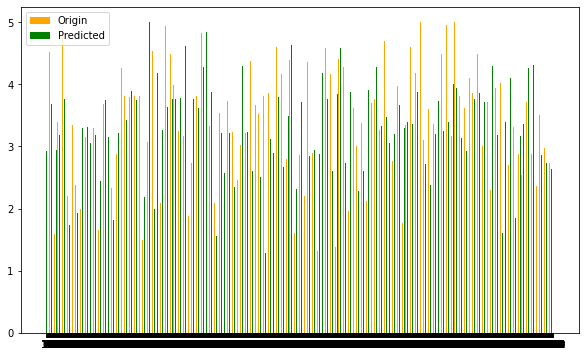

In [202]:
# 실제 점수와 예측 점수를 리스트로 추출합니다. 
origin = origin_rating_list
predicted = predicted_rating_list

# 영화의 개수만큼 bar 그래프의 index 개수를 생성합니다. 
plt.rcParams['figure.figsize'] = (10,6)
index = np.arange(len(movie_title_list))
bar_width = 0.2

# 실제 점수와 예측 점수를 bar 그래프로 출력합니다. 
rect1 = plt.bar(index, origin, bar_width,
               color = 'orange',
               label = 'Origin')
rect1 = plt.bar(index+bar_width, predicted, bar_width,
               color = 'green',
               label = 'Predicted')
plt.xticks(index, movie_title_list)
plt.legend()
plt.show()

### `한걸음 더 나아가기`
- `20대가 좋아할만한 영화 예측하기.` 

**20대 유저리스트 선정**
 - 평가하지 않은 user-movie rating들에 대한 예측값을 통해 20대가 좋아할 것 같은 영화 리스트를 선정

In [203]:
user_age_20_list = user_data[user_data['ages']=='20']['user_id'].tolist()

In [ ]:
# 평가하지 않은 user-movie rating들에 대한 예측값을 계산합니다.
preprocess_start = time.time()
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)

# 평가하지 않은 user-movie rating 중에서, 20대의 예측값을 선별합니다.
hidden_user_age_20_movie_predict_dict = {}
for uid, mid, _, predicted_rating, _ in predictions:
    if uid in user_age_20_list:
        if mid in hidden_user_age_20_movie_predict_dict:
            hidden_user_age_20_movie_predict_dict[mid]['sum'] += predicted_rating
            hidden_user_age_20_movie_predict_dict[mid]['count'] += 1
        else:
            hidden_user_age_20_movie_predict_dict[mid] = {}
            hidden_user_age_20_movie_predict_dict[mid]['sum'] = predicted_rating
            hidden_user_age_20_movie_predict_dict[mid]['count'] = 1

# 영화마다 20대 유저의 rating 평균값을 계산합니다.
for movie_id, score_dict in hidden_user_age_20_movie_predict_dict.items():
    score_dict['mean'] = score_dict['sum'] / score_dict['count']
    
# Top 10 movie_id를 추출합니다.
hidden_user_age_20_movie_list = sorted(hidden_user_age_20_movie_predict_dict, 
                                       key=lambda x: (hidden_user_age_20_movie_predict_dict[x]['mean']), 
                                       reverse=True)[:10]

preprocess_end = time.time()
print("preprocess time: %.2f seconds" % (preprocess_end - preprocess_start))

In [ ]:
# 선정된 리스트를 출력합니다. 
print('20대가 좋아할지도 모르는 영호 top10')
print('------------------------------------')
for movie_id in hidden_user_age_20_movie_list:
    movie_title = movie_dict[movie_id]
    age_20_rating = hidden_user_age_20_movie_predict_dict[movie_df]['mean']
    print('title:', movie_title, '| rating:', age_20_rating)